In [2]:
# #dataset ref: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download
from google.colab import files
#uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


# **Import data and libraries**

In [3]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
%matplotlib inline

random.seed(1111)
np.random.seed(1111)
torch.manual_seed(1111)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(1111)

df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# **Check for overall missing values**

In [4]:
for column in df:
  print(column,100*(df[column].isnull().sum()/len(df.index)))

Date 0.0
Location 0.0
MinTemp 1.0208992162793895
MaxTemp 0.8669049910628353
Rainfall 2.2418534304963567
Evaporation 43.166506256015396
Sunshine 48.00976213391998
WindGustDir 7.098858792795271
WindGustSpeed 7.055547916953114
WindDir9am 7.263852605527293
WindDir3pm 2.906641000962464
WindSpeed9am 1.214766946239516
WindSpeed3pm 2.105046060772721
Humidity9am 1.8245565791282825
Humidity3pm 3.09844630826344
Pressure9am 10.356799120033
Pressure3pm 10.331362573903478
Cloud9am 38.42155919153032
Cloud3pm 40.80709473394747
Temp9am 1.214766946239516
Temp3pm 2.4810944589577892
RainToday 2.2418534304963567
RainTomorrow 2.245978275814657


In [5]:
#get all unique location in the dataset
location = df['Location'].unique()
location

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [6]:
#checking for % of missing values for each location
missing_per_loc = {}
missing_per_loc['location'] = []

for column in df:
  missing_per_loc[column] = []

for loc in location:
  temp_df = df.loc[df['Location'] == loc]
  missing_per_loc['location'].append(loc)
  for column in temp_df:
    missing_per_loc[column].append(100*(temp_df[column].isnull().sum()/len(temp_df.index)))
missing_per_loc = pd.DataFrame(missing_per_loc)
missing_per_loc.head()

,location,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,0.0,0.0,0.361842,0.361842,0.953947,100.000000,100.000000,1.052632,1.052632,...,0.296053,0.263158,0.164474,0.263158,57.598684,53.059211,0.296053,0.263158,0.953947,0.953947
1,BadgerysCreek,0.0,0.0,1.196411,0.963775,2.691924,100.000000,100.000000,2.525756,2.525756,...,1.794616,1.827850,5.583250,5.749418,100.000000,100.000000,1.362579,1.462280,2.691924,2.691924
2,Cobar,0.0,0.0,0.199402,0.099701,0.697906,11.399136,81.721502,1.395813,1.395813,...,4.154204,4.154204,0.997009,0.864074,12.628780,10.235959,0.265869,0.232635,0.697906,0.697906
3,CoffsHarbour,0.0,0.0,0.498504,0.631439,1.861083,40.677966,50.348953,11.930874,11.930874,...,0.631439,0.731140,10.335660,10.368893,27.018943,25.855766,0.498504,0.465271,1.861083,1.861083
4,Moree,0.0,0.0,0.066467,0.000000,5.151213,23.828514,31.704885,2.592223,2.558990,...,0.132935,0.166168,0.000000,0.033234,17.879694,13.426388,0.000000,0.000000,5.151213,5.151213


In [7]:
# download missing file check for manual viewing
# from google.colab import files

# missing_per_loc.to_csv('missing_per_loc.csv')
# files.download('missing_per_loc.csv')

# **Missing values processing: replace with Mean and Mode**
Selected these stations as study locations due to having the least overall percentage of missing values accross fields

Potential candidate:
SydneyAirport,
WaggaWagga,
Moree,
Cobar,
Sydney,
MelbourneAirport,
Mildura,
Portland,
Watsonia,
Dartmoor,
Brisbane,
Cairns,
Townsville,
Nuriootpa,
PerthAirport,
Perth,
Hobart,
AliceSprings,
Darwin,

Missing value for each location was replaced with Mode and Mean at that specific location to avoid loss in data quality

In [8]:
numerical = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine',
               'WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
               'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm',
               'Temp9am','Temp3pm']
categorical = ['WindGustDir','WindDir9am','WindDir3pm']
def fill_missing(x,numerical,categorical):
  for i in numerical:
    mean_x = x[i].mean(skipna=True)
    x[i].fillna(mean_x, inplace=True)

  for i in categorical:
    mode_x = x[i].mode(dropna=True)[0]
    x[i].fillna(mode_x, inplace=True)
  return x

In [9]:
#create 1 dataframe which is the combination of all chosen stations datas
station_list = ['SydneyAirport', 'WaggaWagga', 'Moree', 'Cobar', 'Sydney',
                'MelbourneAirport', 'Mildura', 'Portland', 'Watsonia', 'Dartmoor',
                'Brisbane', 'Cairns', 'Townsville', 'Nuriootpa', 'PerthAirport',
                'Perth', 'Hobart', 'AliceSprings', 'Darwin']

df_aus = df.loc[df['Location'] == 'SydneyAirport']


for i in range(1,len(station_list)):
  df_temp = df.loc[df['Location'] == station_list[i]]
  frames = [df_aus,df_temp]
  df_aus = pd.concat(frames)

#dropped since unneeded for purpose of this project
df_aus = df_aus.drop('RainToday', axis=1)
df_aus = df_aus.drop('RainTomorrow', axis=1)
len(df_aus)

58335

In [10]:
#fill all NaN with mean (for numeric) and mode (for categorical)
df_aus = fill_missing(df_aus,numerical,categorical)
df_aus.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
33520,2009-01-01,SydneyAirport,17.7,35.1,0.0,9.8,12.9,S,72.000000,NW,...,15.0,33.0,63.0,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0
33521,2009-01-02,SydneyAirport,18.5,23.0,0.0,11.0,5.9,S,63.000000,SSE,...,15.0,35.0,63.0,58.0,1012.9,1014.1,5.0,6.0,20.6,20.1
33522,2009-01-03,SydneyAirport,16.9,23.2,0.0,9.0,0.5,E,39.888095,ESE,...,15.0,17.0,52.0,50.0,1021.8,1019.4,7.0,8.0,18.9,22.0
33523,2009-01-04,SydneyAirport,18.7,27.1,0.0,5.4,11.3,NE,65.000000,NNE,...,24.0,48.0,60.0,51.0,1018.5,1014.9,2.0,1.0,22.9,25.9
33524,2009-01-05,SydneyAirport,20.2,31.6,0.0,10.0,12.2,NNE,63.000000,WNW,...,11.0,35.0,58.0,52.0,1013.2,1008.0,6.0,3.0,24.9,29.0


In [11]:
#separate month and day into independent column
#ref: https://stackoverflow.com/questions/51072938/how-to-split-dataframe-based-on-years-in-python
def create_time_unit(dt):
    dt['Date'] = pd.to_datetime(dt['Date'], errors='coerce')
    dt['YEAR'] = dt['Date'].dt.year
    dt['MONTH'] = dt['Date'].dt.month
    dt['DAY'] = dt['Date'].dt.day
    return dt



df_aus = create_time_unit(df_aus)
df_aus.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,YEAR,MONTH,DAY
33520,2009-01-01,SydneyAirport,17.7,35.1,0.0,9.8,12.9,S,72.000000,NW,...,13.0,1005.3,1000.2,6.0,6.0,22.9,34.0,2009,1,1
33521,2009-01-02,SydneyAirport,18.5,23.0,0.0,11.0,5.9,S,63.000000,SSE,...,58.0,1012.9,1014.1,5.0,6.0,20.6,20.1,2009,1,2
33522,2009-01-03,SydneyAirport,16.9,23.2,0.0,9.0,0.5,E,39.888095,ESE,...,50.0,1021.8,1019.4,7.0,8.0,18.9,22.0,2009,1,3
33523,2009-01-04,SydneyAirport,18.7,27.1,0.0,5.4,11.3,NE,65.000000,NNE,...,51.0,1018.5,1014.9,2.0,1.0,22.9,25.9,2009,1,4
33524,2009-01-05,SydneyAirport,20.2,31.6,0.0,10.0,12.2,NNE,63.000000,WNW,...,52.0,1013.2,1008.0,6.0,3.0,24.9,29.0,2009,1,5


In [12]:
for column in df_aus:
  print(column,df_aus[column].isnull().sum())

Date 0
Location 0
MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustDir 0
WindGustSpeed 0
WindDir9am 0
WindDir3pm 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0
YEAR 0
MONTH 0
DAY 0


# **Preprocessing data:**
min_max scale for rainfall, humidity 


standard scaling for temp,evaporation,sunshine,wind,pressure,cloud

In [13]:
#use different scaling for Temp, Eva, Sun, maxWind, Wind, Pressure
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm_rain = MinMaxScaler()

ss_temp = StandardScaler()
ss_eva = StandardScaler()
ss_sun = StandardScaler()
ss_max_wind = StandardScaler()
ss_wind = StandardScaler()
ss_pressure = StandardScaler()
ss_cloud = StandardScaler()

In [14]:
df_scaled = df_aus
#min-max rainfall - humidity
df_scaled['Rainfall'] = mm_rain.fit_transform(np.array(df_aus['Rainfall']).reshape(-1, 1))
df_scaled['Humidity9am'] = np.array(df_aus['Humidity9am'])*0.01
df_scaled['Humidity3pm'] = np.array(df_aus['Humidity3pm'])*0.01

#standard scaling temp, evaporation, sunshine, wind, pressure, cloud
df_scaled['MinTemp'] = ss_temp.fit_transform(np.array(df_aus['MinTemp']).reshape(-1, 1))
df_scaled['MaxTemp'] = ss_temp.fit_transform(np.array(df_aus['MaxTemp']).reshape(-1, 1))
df_scaled['Temp9am'] = ss_temp.fit_transform(np.array(df_aus['Temp9am']).reshape(-1, 1))
df_scaled['Temp3pm'] = ss_temp.fit_transform(np.array(df_aus['Temp3pm']).reshape(-1, 1))

#standard scaling evaporation
df_scaled['Evaporation'] = ss_eva.fit_transform(np.array(df_aus['Evaporation']).reshape(-1, 1))

#standard scaling sunshine
df_scaled['Sunshine'] = ss_sun.fit_transform(np.array(df_aus['Sunshine']).reshape(-1, 1))

#standard scaling wind
df_scaled['WindGustSpeed'] = ss_max_wind.fit_transform(np.array(df_aus['WindGustSpeed']).reshape(-1, 1))
df_scaled['WindSpeed9am'] = ss_wind.fit_transform(np.array(df_aus['WindSpeed9am']).reshape(-1, 1))
df_scaled['WindSpeed3pm'] = ss_wind.fit_transform(np.array(df_aus['WindSpeed3pm']).reshape(-1, 1))

#standard scaling pressure
df_scaled['Pressure9am'] = ss_pressure.fit_transform(np.array(df_aus['Pressure9am']).reshape(-1, 1))
df_scaled['Pressure3pm'] = ss_pressure.fit_transform(np.array(df_aus['Pressure3pm']).reshape(-1, 1))

#standard scaling could
df_scaled['Cloud9am'] = ss_cloud.fit_transform(np.array(df_aus['Cloud9am']).reshape(-1, 1))
df_scaled['Cloud3pm'] = ss_cloud.fit_transform(np.array(df_aus['Cloud3pm']).reshape(-1, 1))

df_scaled = df_scaled.drop([i for i in categorical],axis = 1) #only consider numerical for now
df_scaled = df_scaled.drop('Date', axis=1)
#df_scaled = df_scaled.drop('Location', axis=1)
df_scaled.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,YEAR,MONTH,DAY
33520,SydneyAirport,0.655283,1.487368,0.0,1.126303,1.447105,2.478893e+00,0.051528,1.741645,0.63,0.13,-1.692411,-2.072150,0.684126,0.687906,0.695224,1.573405,2009,1,1
33521,SydneyAirport,0.775993,-0.196849,0.0,1.445582,-0.518507,1.784134e+00,0.051528,1.986349,0.63,0.58,-0.612270,-0.085624,0.308006,0.687906,0.358805,-0.401766,2009,1,2
33522,SydneyAirport,0.534573,-0.169010,0.0,0.913450,-2.034836,5.485067e-16,0.051528,-0.215984,0.52,0.50,0.652631,0.671828,1.060245,1.491613,0.110147,-0.131779,2009,1,3
33523,SydneyAirport,0.806171,0.373836,0.0,-0.044387,0.997822,1.938525e+00,1.151921,3.576922,0.60,0.51,0.183623,0.028708,-0.820352,-1.321361,0.695224,0.422406,2009,1,4
33524,SydneyAirport,1.032502,1.000198,0.0,1.179516,1.250544,1.784134e+00,-0.437536,1.986349,0.58,0.52,-0.569633,-0.957409,0.684126,-0.517654,0.987762,0.862912,2009,1,5


In [15]:
df_final = df_scaled.drop('Location', axis=1)
df_final = df_final.drop('YEAR', axis=1)
df_final = df_final.drop('DAY', axis=1)
df_final.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,MONTH
33520,0.655283,1.487368,0.0,1.126303,1.447105,2.478893e+00,0.051528,1.741645,0.63,0.13,-1.692411,-2.072150,0.684126,0.687906,0.695224,1.573405,1
33521,0.775993,-0.196849,0.0,1.445582,-0.518507,1.784134e+00,0.051528,1.986349,0.63,0.58,-0.612270,-0.085624,0.308006,0.687906,0.358805,-0.401766,1
33522,0.534573,-0.169010,0.0,0.913450,-2.034836,5.485067e-16,0.051528,-0.215984,0.52,0.50,0.652631,0.671828,1.060245,1.491613,0.110147,-0.131779,1
33523,0.806171,0.373836,0.0,-0.044387,0.997822,1.938525e+00,1.151921,3.576922,0.60,0.51,0.183623,0.028708,-0.820352,-1.321361,0.695224,0.422406,1
33524,1.032502,1.000198,0.0,1.179516,1.250544,1.784134e+00,-0.437536,1.986349,0.58,0.52,-0.569633,-0.957409,0.684126,-0.517654,0.987762,0.862912,1


In [16]:
data = np.array([df_final])
data = np.squeeze(data,0)
data[11]

array([ 0.77599304, -0.05765724,  0.00217628,  0.8602369 ,  1.0259023 ,
       -0.06855687, -0.68206803,  1.12988616,  0.81      ,  0.72      ,
       -0.2427486 ,  0.25737299, -1.19647148, -0.51765401,  0.5343277 ,
        0.10978912,  1.        ])

# **Define hyperparameters**

In [17]:
# define hyperparameters
N_INPUT_DAYS = 60
N_OUTPUT_DAYS = 30
LEARNING_RATE = 0.001
BATCH_SIZE = 128
NUM_EPOCHS = 100
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

HIDDEN_DIM = 32
FC_HIDDEN_DIM = 64

# **Prepare dataloader**

In [18]:
# create 90 days sliding windows
def create_window(x, input_size = 60, output_size = 15, axis = 0):
  length = len(x)
  window = np.lib.stride_tricks.sliding_window_view(x,input_size + output_size, axis = axis)
  #window = window.squeeze(0)
  return window

#split data into train,test,val
def split_data(x, train_ratio = 0.8, test_ratio = 0.2):
    import random
    train_size = int(train_ratio*len(x))
    test_size = int(test_ratio*len(x))
    val_size = len(x) - train_size - test_size
    my_list = [0]*train_size + [1]*val_size + [2]*test_size

    random.shuffle(my_list)
    
    train_data = []
    val_data = []
    test_data = []
    
    counter = 0
    for i in my_list:
        if i == 0:
            train_data.append(x[counter])
        if i == 1:
            val_data.append(x[counter])
        if i == 2:
            test_data.append(x[counter])
        counter +=1

    return train_data, val_data, test_data

# The last couple of years will be used to measure model after training, seperate from the test set
def split_by_year(df,year):
  split_point = df.index[(df['YEAR'] == year) & (df['MONTH'] == 1) & (df['DAY'] == 1)][0]
  train_df = df.loc[:split_point,]
  test_df = df.loc[split_point:,]

  return (train_df,test_df)

In [19]:
data = create_window(data,input_size = N_INPUT_DAYS, output_size = N_OUTPUT_DAYS)

train_data, val_data, test_data = split_data(data,train_ratio = 0.8, test_ratio = 0.05)
print(len(train_data), len(val_data), len(test_data))

46596 8738 2912


In [20]:
train_data = torch.from_numpy(np.array(train_data))
val_data = torch.from_numpy(np.array(val_data))
test_data = torch.from_numpy(np.array(test_data))

print(train_data.shape, val_data.shape, test_data.shape)

torch.Size([46596, 17, 90]) torch.Size([8738, 17, 90]) torch.Size([2912, 17, 90])


In [21]:
train_data[0]

tensor([[ 0.6553,  0.7760,  0.5346,  ...,  0.4290,  0.8062,  0.9118],
        [ 1.4874, -0.1968, -0.1690,  ...,  0.3460,  0.0537, -0.3360],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0044],
        ...,
        [ 0.6952,  0.3588,  0.1101,  ...,  0.2564,  0.3003,  0.3734],
        [ 1.5734, -0.4018, -0.1318,  ...,  0.2803,  0.1666, -0.3591],
        [ 1.0000,  1.0000,  1.0000,  ...,  3.0000,  3.0000,  3.0000]],
       dtype=torch.float64)

In [22]:
train_data_list = list(train_data)
val_data_list = list(val_data)
test_data_list = list(test_data)

from torch.utils.data import DataLoader

def collate_batch(batch): 
    input_list, target_list, month_list = [], [] ,[]

    for i in batch:
        temp = np.array(i)
        prior = temp[:-1,:N_INPUT_DAYS]
        future = temp[2,N_INPUT_DAYS:]
        month = temp[-1,N_INPUT_DAYS:] -1 #turn months from 1-12 to 0-11
        #month = torch.nn.functional.one_hot(torch.tensor(month).to(torch.int64),num_classes = 12)

        input_list.append(prior)
        target_list.append(future)
        month_list.append(month)

    return torch.tensor(target_list).float().unsqueeze_(1), torch.tensor(input_list).float(), torch.tensor(month_list).float() #torch.stack(month_list).float()

train_dataloader = DataLoader(train_data_list,collate_fn = collate_batch, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_data_list, collate_fn = collate_batch, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_data_list, collate_fn = collate_batch, batch_size=BATCH_SIZE, shuffle=False)


In [23]:
print(next(iter(train_dataloader))[2].shape)

torch.Size([128, 30])


<ipython-input-22-6ee18bc9d2b5>:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.tensor(target_list).float().unsqueeze_(1), torch.tensor(input_list).float(), torch.tensor(month_list).float() #torch.stack(month_list).float()


# **Create model architecture**


In [24]:
#define model
class Rain_LSTM(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size, fc_hidden_size, n_layers = 1):
    super(Rain_LSTM, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.fc_hidden_size = fc_hidden_size
    self.output_size = output_size
    self.n_layers = n_layers
    self.relu = torch.nn.ReLU()

    # add cells

    self.unit = torch.nn.LSTM(input_size = input_size,
                        hidden_size = hidden_size,
                        num_layers = n_layers,
                        batch_first = True)

    self.fc = torch.nn.Linear(hidden_size, fc_hidden_size)
    self.fc_final = torch.nn.Linear(fc_hidden_size, output_size)

    self.fc_month = torch.nn.Linear(12, hidden_size)


  def forward(self, input, month):
    #layer reshape. ref: https://discuss.pytorch.org/t/how-to-reshape-the-output-of-a-linear-layer-in-pytorch/164057/3

    #LSTM layer followed by 2 dense layer
    output,(hidden,cell) = self.unit(input)

    hidden.squeeze_(0)
    output = self.relu(hidden)

    #one hot encoding month and pass it thru fc layer

    eb_month = torch.mode(month,dim = -1).values

    eb_month = torch.nn.functional.one_hot(eb_month.to(torch.int64),num_classes = 12)
    eb_month = self.fc_month(eb_month.float())

    #add embedded month result to lstm output
    # eb_month.squeeze_(1)

    output += eb_month

    #send lstm output to fc layer for final results
    output = self.fc(hidden)
    output = self.relu(output)
    output = self.fc_final(output)
    output = self.relu(output)
        
    return output, hidden, cell

model = Rain_LSTM(input_size = 16,
             hidden_size = HIDDEN_DIM,
             fc_hidden_size = FC_HIDDEN_DIM,
             output_size=30 
)
print(model)
#(self,input_size,hidden_size,output_size,fc_hidden_size,n_layers = 1)

Rain_LSTM(
  (relu): ReLU()
  (unit): LSTM(16, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=64, bias=True)
  (fc_final): Linear(in_features=64, out_features=30, bias=True)
  (fc_month): Linear(in_features=12, out_features=32, bias=True)
)


# **Define training Method**

In [25]:
def save_best_model(current_loss,best_loss):
  if current_loss < best_loss:
    torch.save(model.state_dict(), 'best-model-parameters.pt')
    best_loss = current_loss
  return(best_loss)

In [26]:
def train_model(model, num_epochs, train_loader,
                val_loader, optimizer,device,logging_interval=50):
    best_loss = 999
    best_val_loss = 999
    start_time = time.time()
    minibatch_loss_list = []
    minibatch_val_loss_list = []
    
    for epoch in range(num_epochs):

        model.train()
        for batch_idx, (targets, input, month) in enumerate(train_loader):
            #print(batch_idx)
            #input.unsqueeze_(-1)

            input = input.to(device)
            targets = targets.to(device)
            month = month.to(device)

            input = input.permute(0,2,1)
            targets.squeeze_(1)

            #print(month)
            # ## FORWARD AND BACK PROP
            optimizer.zero_grad()
            
            
            pred, hidden, cell = model(input, month)

            #loss_fn = torch.nn.L1Loss()
            loss_fn = torch.nn.MSELoss()
            #loss_fn = torch.nn.CrossEntropyLoss(weight = weights)
            #loss_fn = torch.nn.SmoothL1Loss()
            #loss_fn = torch.nn.HuberLoss()

            #loss = loss_fn(pred.permute(1,2,0), targets.permute(1,2,0)) #for crossentropy

            loss = loss_fn(pred, targets)

            #record best model
            best_loss = save_best_model(loss,best_loss)

            loss.backward()

            # ## UPDATE MODEL PARAMETERS
            optimizer.step()

            # ## LOGGING
            minibatch_loss_list.append(loss.item())
            if not batch_idx % logging_interval:
                print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                      f'| Batch {batch_idx:04d}/{len(train_loader):04d} '
                      f'| Loss: {loss:.6f}')
        
        #load model with best train loss
        #model.load_state_dict(torch.load('best-model-parameters.pt'))

        model.eval()
        for batch_idx, (targets, input, month) in enumerate(val_loader):
            #print(batch_idx)
            #input.unsqueeze_(-1)

            input = input.to(device)
            targets = targets.to(device)
            month = month.to(device)

            input = input.permute(0,2,1)
            targets.squeeze_(1)
            # ## FORWARD AND BACK PROP
            pred, hidden, cell = model(input, month)

            #loss_fn = torch.nn.L1Loss()
            #loss_fn2 = torch.nn.MSELoss()
            val_loss = loss_fn(pred, targets)

            # ## LOGGING
            minibatch_val_loss_list.append(val_loss.item())
            if not batch_idx % logging_interval:
                print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                      f'| Batch {batch_idx:04d}/{len(val_loader):04d} '
                      f'| Loss: {val_loss:.6f}')
    return minibatch_loss_list, minibatch_val_loss_list

# **Training Visualization Code**

In [27]:
import matplotlib.pyplot as plt

def plot_training_loss(minibatch_loss_list, num_epochs, iter_per_epoch,
                       results_dir=None, averaging_iterations=30):

    plt.figure()
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(range(len(minibatch_loss_list)),
             (minibatch_loss_list), label='Minibatch Loss')

    if len(minibatch_loss_list) > 1000:
        ax1.set_ylim([
            0, np.max(minibatch_loss_list[1000:])*1.5
            ])
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Loss')

    ax1.plot(np.convolve(minibatch_loss_list,
                         np.ones(averaging_iterations,)/averaging_iterations,
                         mode='valid'),
             label='Running Average')
    ax1.legend()

    ###################
    # Set scond x-axis
    ax2 = ax1.twiny()
    newlabel = list(range(num_epochs+1))

    newpos = [e*iter_per_epoch for e in newlabel]

    ax2.set_xticks(newpos[::10])
    ax2.set_xticklabels(newlabel[::10])

    ax2.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_label_position('bottom')
    ax2.spines['bottom'].set_position(('outward', 45))
    ax2.set_xlabel('Epochs')
    ax2.set_xlim(ax1.get_xlim())
    ###################

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, 'plot_training_loss.pdf')
        plt.savefig(image_path)

# **Model Training**

In [ ]:
model = model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE/2)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       #factor=0.1,
                                                       #mode='max',
                                                       #verbose=True)

minibatch_loss_list,minibatch_val_loss_list = train_model(
    model=model,
    num_epochs=10,
    train_loader=train_dataloader,
    val_loader=val_dataloader,
    optimizer=optimizer,
    device=DEVICE,
    logging_interval=75)

Epoch: 001/010 | Batch 0000/0365 | Loss: 0.000547
Epoch: 001/010 | Batch 0075/0365 | Loss: 0.000485
Epoch: 001/010 | Batch 0150/0365 | Loss: 0.000790
Epoch: 001/010 | Batch 0225/0365 | Loss: 0.000325
Epoch: 001/010 | Batch 0300/0365 | Loss: 0.000393
Epoch: 001/010 | Batch 0000/0069 | Loss: 0.000714
Epoch: 002/010 | Batch 0000/0365 | Loss: 0.000637
Epoch: 002/010 | Batch 0075/0365 | Loss: 0.000515
Epoch: 002/010 | Batch 0150/0365 | Loss: 0.000499
Epoch: 002/010 | Batch 0225/0365 | Loss: 0.000331
Epoch: 002/010 | Batch 0300/0365 | Loss: 0.000471
Epoch: 002/010 | Batch 0000/0069 | Loss: 0.000713
Epoch: 003/010 | Batch 0000/0365 | Loss: 0.000619
Epoch: 003/010 | Batch 0075/0365 | Loss: 0.000528
Epoch: 003/010 | Batch 0150/0365 | Loss: 0.000720
Epoch: 003/010 | Batch 0225/0365 | Loss: 0.000504
Epoch: 003/010 | Batch 0300/0365 | Loss: 0.000597
Epoch: 003/010 | Batch 0000/0069 | Loss: 0.000712
Epoch: 004/010 | Batch 0000/0365 | Loss: 0.000377
Epoch: 004/010 | Batch 0075/0365 | Loss: 0.000431


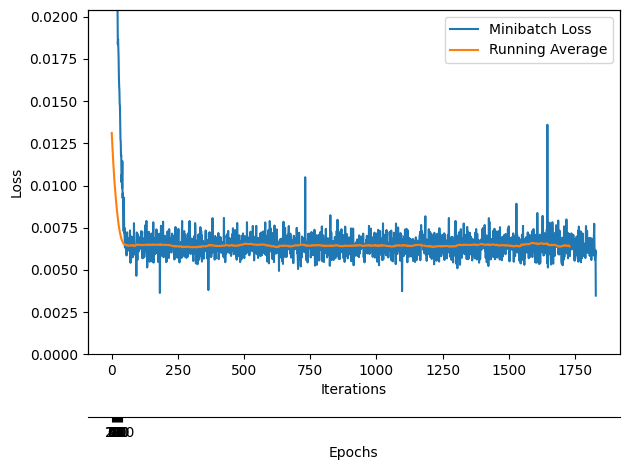

In [ ]:
plot_training_loss(minibatch_loss_list, NUM_EPOCHS, NUM_EPOCHS/BATCH_SIZE,
                       results_dir=None, averaging_iterations=100)

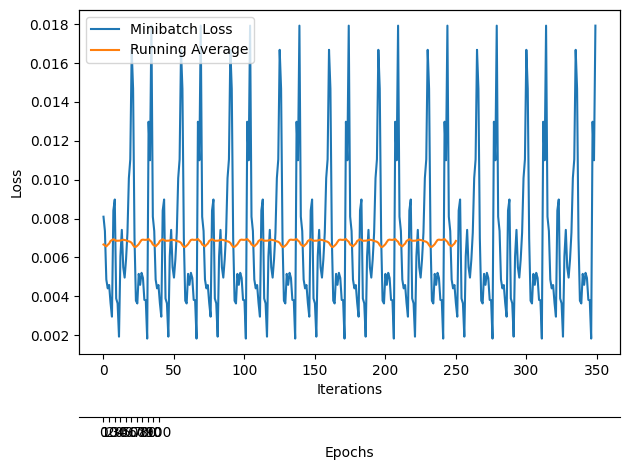

In [ ]:
plot_training_loss(minibatch_val_loss_list, NUM_EPOCHS, NUM_EPOCHS/BATCH_SIZE,
                       results_dir=None, averaging_iterations=100)

# **Visualize Prediction**

In [ ]:
def test_model(model, num_epochs, test_loader,device,logging_interval=100):

    start_time = time.time()
    minibatch_val_loss_list = []
    pred_list = []
    target_list = []
    
    for epoch in range(num_epochs):
        model.eval()
        with torch.no_grad():
          for batch_idx, (targets, input, month) in enumerate(test_loader):
              #print(batch_idx)
              #input.unsqueeze_(-1)

              input = input.to(device)
              targets = targets.to(device)
              input = input.permute(0,2,1)
              targets.squeeze_(1)
              # ## FORWARD AND BACK PROP
              pred, hidden, cell = model(input, month)

              loss_fn = torch.nn.SmoothL1Loss()
              #loss_fn = torch.nn.MSELoss()
              test_loss = loss_fn(pred, targets)

              pred_list.append(pred)
              target_list.append(targets)

              # ## LOGGING
              minibatch_val_loss_list.append(test_loss.item())
              if not batch_idx % logging_interval:
                  print(f'Epoch: {epoch+1:03d}/{num_epochs:03d} '
                        f'| Batch {batch_idx:04d}/{len(test_loader):04d} '
                        f'| Loss: {test_loss:.4f}')
    return minibatch_val_loss_list,pred_list,target_list

In [ ]:
minibatch_val_loss_list,pred_list,target_list = test_model(model, 1, test_dataloader, DEVICE)

Epoch: 001/001 | Batch 0000/0023 | Loss: 0.0004


In [ ]:
mm_rain.inverse_transform(pred_list[0].permute(1,0).numpy())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
mm_rain.inverse_transform(target_list[1].permute(1,0).numpy())

array([[0.        , 4.45593   , 0.27421108, ..., 0.        , 4.798694  ,
        5.826986  ],
       [0.        , 0.        , 0.        , ..., 0.3427639 , 5.826986  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.10282917, 0.        , ..., 0.        , 1.0968443 ,
        1.1653972 ],
       [0.41131666, 0.        , 0.        , ..., 0.        , 1.1653972 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03427638]], dtype=float32)

In [ ]:
real_pred_list = np.vstack(pred_list)
real_pred_list = mm_rain.inverse_transform(real_pred_list)
#real_pred_list = real_pred_list.squeeze(1)
real_pred_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
real_target_list = np.vstack(target_list)
real_target_list = mm_rain.inverse_transform(real_target_list)
#real_target_list = real_target_list.squeeze(1)
real_target_list

array([[0.06855277, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.27421108, 7.4379764 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 3.5990207 , 0.17138195,
        4.5244827 ],
       ...,
       [0.        , 0.03427638, 0.5826986 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03427638],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
real_target_list.shape

(2912, 30)

In [ ]:
single_real_target_list = np.reshape(real_target_list,(30*len(real_target_list),1))
single_real_pred_list =  np.reshape(real_pred_list,(30*len(real_pred_list),1))

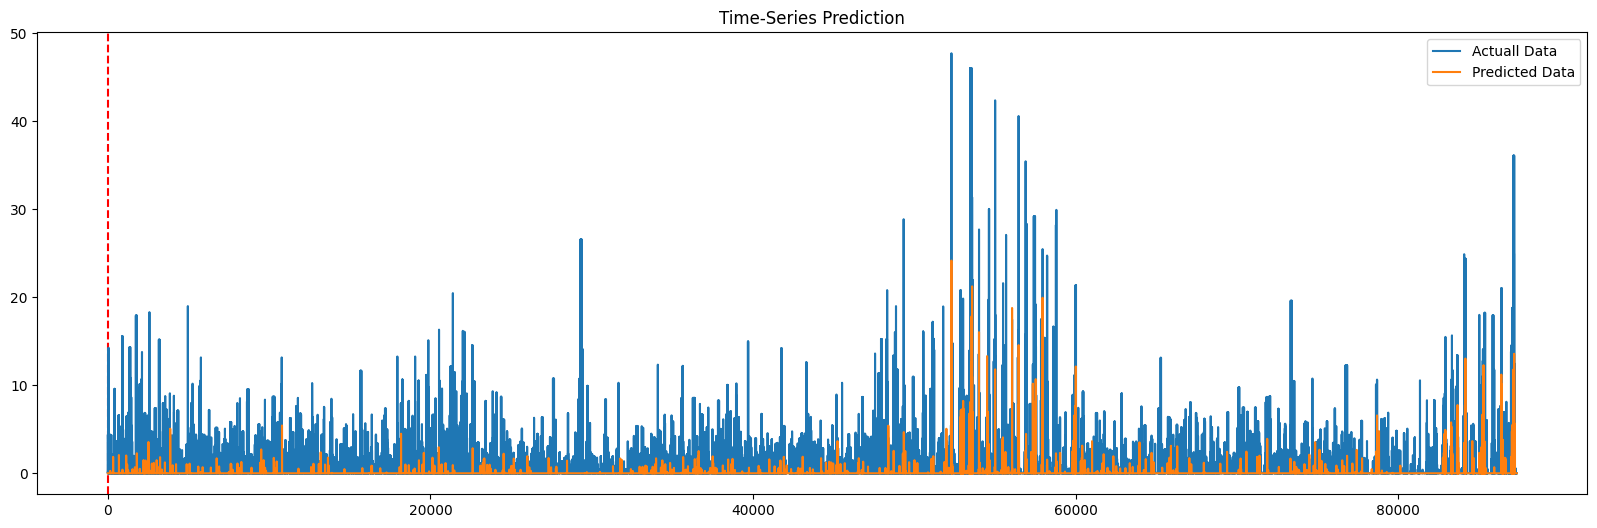

In [ ]:
plt.figure(figsize=(20,6)) #plotting
plt.axvline(x=len(real_target_list[0]), c='r', linestyle='--') #size of the training set

plt.plot(single_real_target_list, label='Actuall Data') #actual plot
plt.plot(single_real_pred_list, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# **Save and load model**

In [ ]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Rain_LSTM(
  (relu): ReLU()
  (unit): LSTM(16, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=64, bias=True)
  (fc_final): Linear(in_features=64, out_features=1, bias=True)
  (fc_month): Linear(in_features=12, out_features=32, bias=True)
) 

The state dict keys: 

 odict_keys(['unit.weight_ih_l0', 'unit.weight_hh_l0', 'unit.bias_ih_l0', 'unit.bias_hh_l0', 'fc.weight', 'fc.bias', 'fc_final.weight', 'fc_final.bias', 'fc_month.weight', 'fc_month.bias'])


In [ ]:
torch.save(model.state_dict(), 'checkpoint.pth')

#download checkpoint file
files.download('checkpoint.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# state_dict = torch.load('checkpoint.pth')

uploaded = files.upload()

# print(state_dict.keys())

Saving 30_days_128batch_50epochs.pth to 30_days_128batch_50epochs.pth


In [29]:
model.load_state_dict(torch.load('30_days_128batch_50epochs.pth'))

<All keys matched successfully>

# **Result evaluation**

In [ ]:
# model.load_state_dict(state_dict)
#evaluate time series
#plot residual
#calculate MSE
#compare vs random model
#compare with simple model

In [ ]:
#calculate MSE and RMSE
import math
from sklearn.metrics import mean_absolute_error as mae
 
MSE = np.square(np.subtract(real_target_list,real_pred_list)).mean() 
 
RMSE = math.sqrt(MSE)

MAE = mae(real_target_list,real_pred_list)
print('MSE',MSE)
print('RMSE',RMSE)
print('MAE',MAE)

MSE 2.1413593
RMSE 1.4633384192399355
MAE 0.38909876


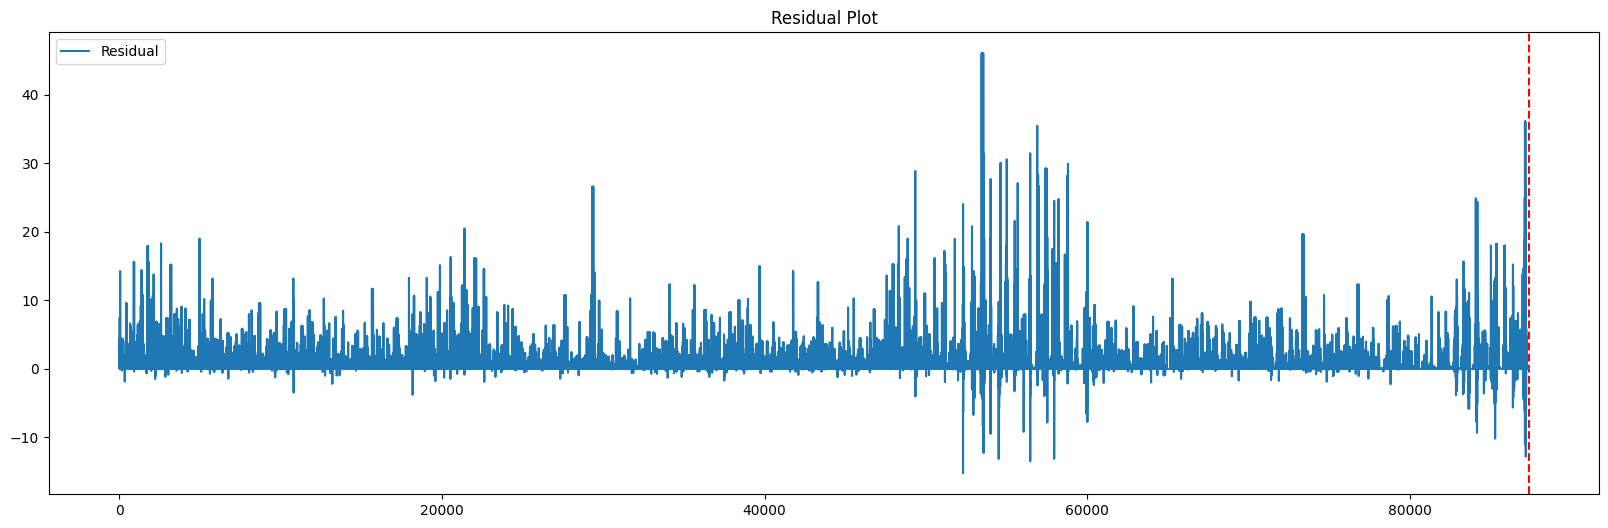

In [ ]:
#plot Residual
residual = np.subtract(single_real_target_list,single_real_pred_list)

plt.figure(figsize=(20,6)) #plotting
plt.axvline(x=len(residual), c='r', linestyle='--') #size of the training set

plt.plot(residual, label='Residual') #actual plot
plt.title('Residual Plot')
plt.legend()
plt.show() 

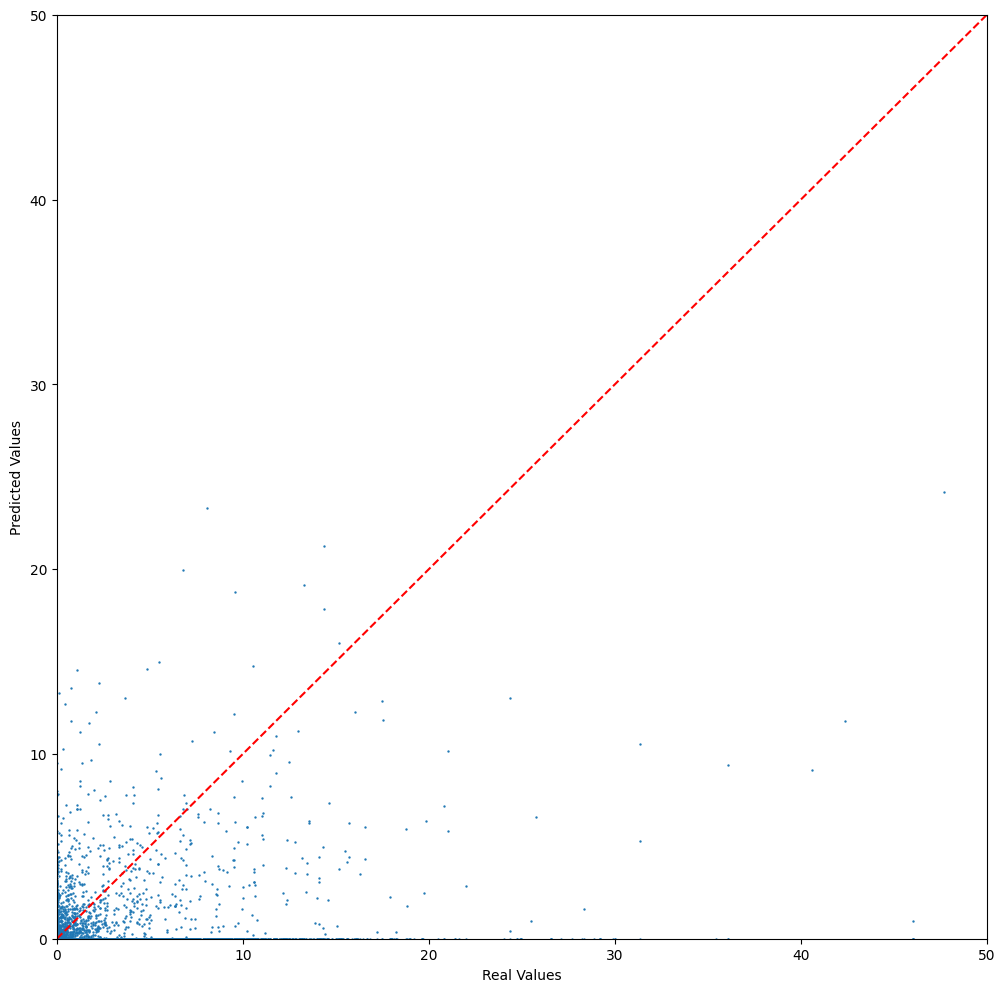

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(single_real_target_list, single_real_pred_list, s = 0.5)
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.axline( (0,0),slope=1,linestyle='--',color='red')

# **Compare with random model**

In [ ]:
#compare with random model prediction:
random_model = Rain_LSTM(input_size = 16,
             hidden_size = 32,
             fc_hidden_size = 64,
             output_size=30)

random_val_list,random_pred_list,random_target_list = test_model(random_model, 1, test_dataloader, DEVICE)

random_pred_list = np.vstack(random_pred_list)
random_pred_list = mm_rain.inverse_transform(random_pred_list)


random_target_list = np.vstack(random_target_list)
random_target_list = mm_rain.inverse_transform(random_target_list)



random_MSE = np.square(np.subtract(random_target_list,random_pred_list)).mean() 
 
random_RMSE = math.sqrt(random_MSE)

random_MAE = mae(random_target_list,random_pred_list)
print('MSE',random_MSE)
print('RMSE',random_RMSE)
print('MAE',random_MAE)

Epoch: 001/001 | Batch 0000/0023 | Loss: 0.0015
MSE 392.0345
RMSE 19.799860728380924
MAE 11.923279


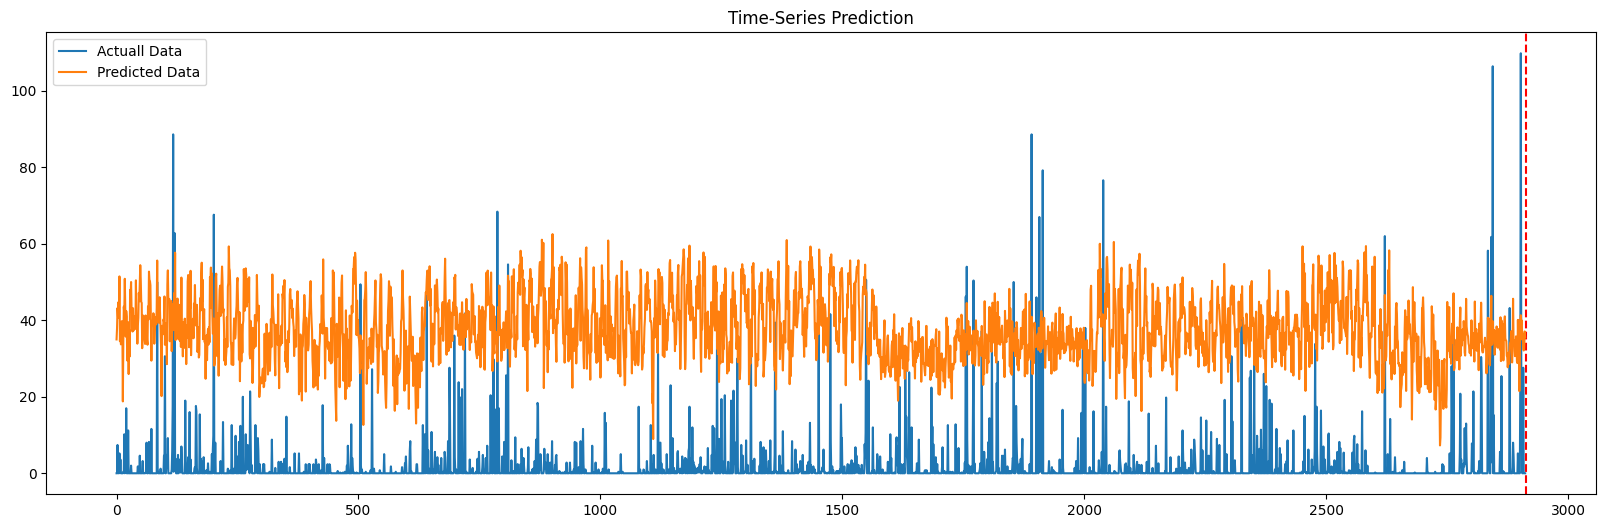

In [ ]:
plt.figure(figsize=(20,6)) #plotting
plt.axvline(x=len(real_target_list), c='r', linestyle='--') #size of the training set

plt.plot(random_target_list, label='Actuall Data') #actual plot
plt.plot(random_pred_list, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# **Perform 30 days prediction**

In [30]:
uploaded = files.upload()

Saving sydney.csv to sydney.csv


In [46]:
df_30_pred = pd.read_csv('sydney.csv')

df_30_pred = df_30_pred[-150:-30]
df_30_pred.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
146,27-03-23,Sydney,19.4,24.6,8.2,4.4,0.4,W,28,N,...,98,86,1013.3,1010.4,8,7,19.6,23.4,No,No
147,28-03-23,Sydney,19.5,24.8,0.6,2.8,0.4,W,24,W,...,90,81,1013.8,1013.3,7,8,21.4,23.2,No,No
148,29-03-23,Sydney,19.6,27.1,4.2,1.4,4.7,W,54,NNW,...,88,69,1007.1,1000.6,8,6,20.7,24.3,No,No
149,30-03-23,Sydney,15.6,25.7,0.0,5.8,10.3,W,41,W,...,69,34,1006.5,1005.8,1,7,17.2,24.1,No,No
150,31-03-23,Sydney,14.3,25.7,0.0,5.8,10.0,W,39,W,...,63,38,1011.6,1009.4,1,1,15.5,25.0,No,No


In [47]:
len(df_30_pred)

120

In [48]:
df_30_pred_scaled = df_30_pred.copy()
#min-max rainfall - humidity
df_30_pred_scaled['Rainfall'] = mm_rain.fit_transform(np.array(df_30_pred['Rainfall']).reshape(-1, 1))
df_30_pred_scaled['Humidity9am'] = np.array(df_30_pred['Humidity9am'])*0.01
df_30_pred_scaled['Humidity3pm'] = np.array(df_30_pred['Humidity3pm'])*0.01

#standard scaling temp, evaporation, sunshine, wind, pressure, cloud
df_30_pred_scaled['MinTemp'] = ss_temp.fit_transform(np.array(df_30_pred['MinTemp']).reshape(-1, 1))
df_30_pred_scaled['MaxTemp'] = ss_temp.fit_transform(np.array(df_30_pred['MaxTemp']).reshape(-1, 1))
df_30_pred_scaled['Temp9am'] = ss_temp.fit_transform(np.array(df_30_pred['Temp9am']).reshape(-1, 1))
df_30_pred_scaled['Temp3pm'] = ss_temp.fit_transform(np.array(df_30_pred['Temp3pm']).reshape(-1, 1))

#standard scaling evaporation
df_30_pred_scaled['Evaporation'] = ss_eva.fit_transform(np.array(df_30_pred['Evaporation']).reshape(-1, 1))

#standard scaling sunshine
df_30_pred_scaled['Sunshine'] = ss_sun.fit_transform(np.array(df_30_pred['Sunshine']).reshape(-1, 1))

#standard scaling wind
df_30_pred_scaled['WindGustSpeed'] = ss_max_wind.fit_transform(np.array(df_30_pred['WindGustSpeed']).reshape(-1, 1))
df_30_pred_scaled['WindSpeed9am'] = ss_wind.fit_transform(np.array(df_30_pred['WindSpeed9am']).reshape(-1, 1))
df_30_pred_scaled['WindSpeed3pm'] = ss_wind.fit_transform(np.array(df_30_pred['WindSpeed3pm']).reshape(-1, 1))

#standard scaling pressure
df_30_pred_scaled['Pressure9am'] = ss_pressure.fit_transform(np.array(df_30_pred['Pressure9am']).reshape(-1, 1))
df_30_pred_scaled['Pressure3pm'] = ss_pressure.fit_transform(np.array(df_30_pred['Pressure3pm']).reshape(-1, 1))

#standard scaling could
df_30_pred_scaled['Cloud9am'] = ss_cloud.fit_transform(np.array(df_30_pred['Cloud9am']).reshape(-1, 1))
df_30_pred_scaled['Cloud3pm'] = ss_cloud.fit_transform(np.array(df_30_pred['Cloud3pm']).reshape(-1, 1))

df_30_pred_scaled = df_30_pred_scaled.drop([i for i in categorical],axis = 1) #only consider numerical for now
df_30_pred_scaled = df_30_pred_scaled.drop('Location',axis = 1)
df_30_pred_scaled = df_30_pred_scaled.drop('Date',axis = 1)
df_30_pred_scaled = df_30_pred_scaled.drop('RainToday', axis = 1)
df_30_pred_scaled = df_30_pred_scaled.drop('RainTomorrow', axis = 1)
df_30_pred_scaled.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
31,-0.872777,-0.475318,0.000000,1.197354,-0.028323,-0.822990,0.750020,-0.446582,0.60,0.50,0.548764,0.686279,0.858405,0.784363,-0.477830,-0.227108
32,-1.430554,-0.777107,0.000000,0.329182,1.222622,-1.002063,-0.660676,0.023504,0.74,0.52,0.878196,0.767017,-0.607909,-1.128717,-0.703754,-0.517721
33,-1.344742,-0.240593,0.000000,-0.104904,1.199019,0.072375,-1.648162,0.650286,0.74,0.45,0.548764,0.282585,0.125248,-1.128717,-0.523015,-0.162528
34,-0.915683,0.396517,0.000000,1.305876,0.632554,-0.106698,0.185742,-0.289886,0.73,0.59,-0.907672,-1.461370,-0.974488,-0.363485,0.335498,0.289536
35,-0.486624,-0.844171,0.104762,0.690920,1.010198,0.161912,0.185742,0.023504,0.73,0.52,-1.167749,-0.912347,-0.607909,-0.363485,-0.161536,-0.840624


In [49]:
apr_2023_test_real = np.array(df_30_pred['Rainfall'][-30:])
apr_2023_test_real

array([ 0. ,  2.2, 20. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0.6,  9.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0.2,  1.2,
        4.6,  0. ,  1.8,  8.2,  0.6,  4.2,  0. ,  0. ])

In [50]:
apr_2023_test_input = np.array(df_30_pred_scaled[:-30])
apr_2023_test_input = torch.from_numpy(apr_2023_test_input).float()
apr_2023_test_input.unsqueeze_(0)

apr_2023_test_input.shape

torch.Size([1, 90, 16])

In [51]:
apr_2023_test_month = torch.tensor([2]*30).float()
apr_2023_test_month.shape

torch.Size([30])

In [43]:
apr_2023_pred, _, _= model(apr_2023_test_input, apr_2023_test_month)

In [52]:
with torch.no_grad():
  apr_2023_pred, _, _= model(apr_2023_test_input, apr_2023_test_month)


apr_2023_pred = np.vstack(apr_2023_pred)
apr_2023_pred = mm_rain.inverse_transform(apr_2023_pred)
apr_2023_pred = apr_2023_pred.squeeze(0)
apr_2023_pred

array([1.4356799 , 0.87067175, 0.5187161 , 0.        , 0.5204725 ,
       0.        , 0.        , 0.80595773, 0.72874355, 0.6718612 ,
       0.        , 0.6086186 , 0.5596738 , 0.        , 0.6559615 ,
       0.        , 0.45501563, 0.51789653, 0.5396634 , 0.648838  ,
       0.        , 0.46832916, 0.49971294, 0.46920106, 0.66787595,
       0.6496598 , 0.648787  , 0.        , 0.4414092 , 0.4479237 ],
      dtype=float32)

In [53]:
apr_2023_pred = np.insert(apr_2023_pred, 0, 0, axis=0)
apr_2023_test_real = np.insert(apr_2023_test_real, 0, 0, axis=0)
print(apr_2023_test_real)
print(apr_2023_pred)

[ 0.   0.   2.2 20.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.6
  9.8  0.   0.   0.   0.   0.   0.6  0.2  1.2  4.6  0.   1.8  8.2  0.6
  4.2  0.   0. ]
[0.         1.4356799  0.87067175 0.5187161  0.         0.5204725
 0.         0.         0.80595773 0.72874355 0.6718612  0.
 0.6086186  0.5596738  0.         0.6559615  0.         0.45501563
 0.51789653 0.5396634  0.648838   0.         0.46832916 0.49971294
 0.46920106 0.66787595 0.6496598  0.648787   0.         0.4414092
 0.4479237 ]


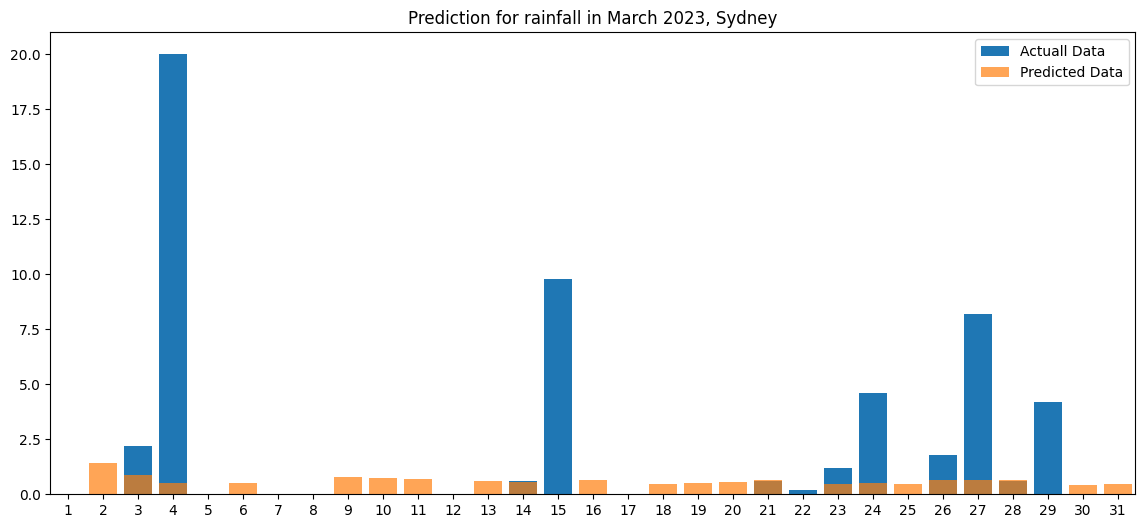

In [54]:
plt.figure(figsize=(14,6)) #plotting
plt.bar(range(1,32),apr_2023_test_real, label='Actuall Data') #actual plot
plt.bar(range(1,32),apr_2023_pred, label='Predicted Data',alpha=0.7) #predicted plot
plt.xlim([0.5,31.5])
plt.xticks([i for i in range(1,32)])
plt.title('Prediction for rainfall in March 2023, Sydney')
plt.legend()
plt.show() 